First 5 rows:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

=== Model Evaluation ===
MAE: 970043.40
MSE: 1754318687330.66
R² Score: 0.65

=== C

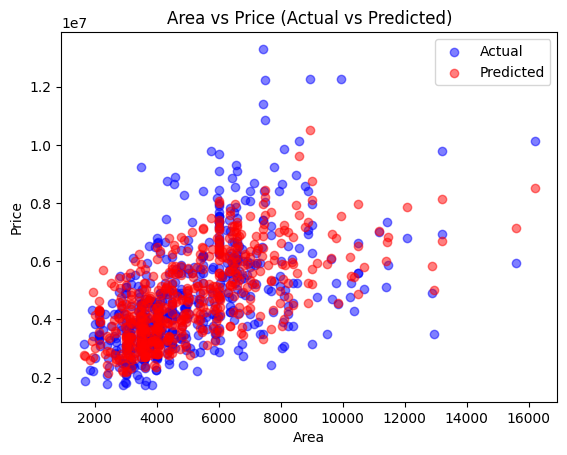

In [5]:
# === Import libraries ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# === Load the dataset ===
df = pd.read_csv('Housing.csv')
print("First 5 rows:\n", df.head())

# === Convert categorical variables to dummy variables ===
df = pd.get_dummies(df, drop_first=True)

# === Split into features (X) and target (y) ===
X = df.drop('price', axis=1)
y = df['price']

# === Split into training and testing sets ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Fit the model ===
model = LinearRegression()
model.fit(X_train, y_train)

# === Make predictions ===
y_pred = model.predict(X_test)

# === Evaluate the model ===
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Model Evaluation ===")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# === Coefficient interpretation ===
print("\n=== Coefficients ===")
print('Intercept:', model.intercept_)
coeff_df = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print(coeff_df)

# === Plot actual vs predicted prices vs area (as an example) ===
plt.scatter(df['area'], df['price'], color='blue', alpha=0.5, label='Actual')
plt.scatter(df['area'], model.predict(X), color='red', alpha=0.5, label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price (Actual vs Predicted)')
plt.legend()
plt.show()
